Solve time is 0.0024819374084472656


/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


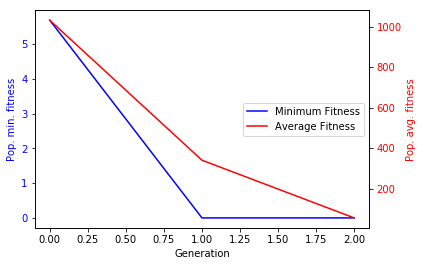

In [315]:
import time
import random

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import benchmarks
import numpy

number_of_variables=1
x_min= -50
x_max = 50
pop_size=20
generations=2


start_time=time.time()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual",  list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator
toolbox.register("attr_float", random.uniform, a=x_min, b=x_max)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, number_of_variables)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def objectiveFunction(individual):
    return individual[0]**2,

y_min= objectiveFunction([x_min])[0]
y_max= objectiveFunction([x_max])[0]

# Operator registering
toolbox.register("evaluate", objectiveFunction)
toolbox.register("mate", tools.cxUniform, indpb=0.05)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    random.seed(64)
    
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_fit.register("avg", numpy.mean)
    stats_fit.register("std", numpy.std)
    stats_fit.register("min", numpy.min)
    stats_fit.register("max", numpy.max)
    stats_fit.register("all", list)
    
    stats_ind = tools.Statistics(lambda ind: ind)
    stats_ind.register("all", list)
    
    mstats = tools.MultiStatistics(fitness=stats_fit, ind=stats_ind)

    pop, logbook = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=0.5, 
        mutpb=0.2, 
        ngen=generations,
        stats=mstats, 
        halloffame=hof,
        verbose=False
    )

end_time = time.time()
solve_time = end_time - start_time
#print(pop[1])
print("Solve time is {}".format(solve_time))

### Draw graph
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["fitness"].select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Pop. min. fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
ax2.set_ylabel("Pop. avg. fitness", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

### Show final population
#pop

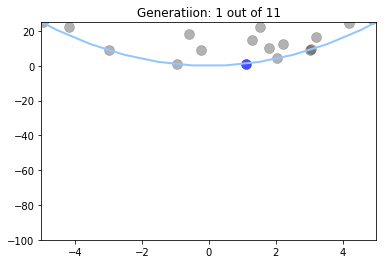

In [351]:
### Show animation
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

# https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
scats = []

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_min, x_max))
ax.set_ylim(( -100, y_max))
x = np.linspace(-50, 50, 100)
y = x**2

line, = ax.plot([], [], lw=2)
line.set_data(x, y)


def animate(i):
    
    ax.set_title("Generatiion: {} out of {}".format(i+1, len(fit_mins)))

    # https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
    global scats
        # first remove all old scatters
    for scat in scats:
        scat.remove()
    scats=[]

    x_all = logbook.chapters['ind'].select('all')[i]
    y_all = logbook.chapters['fitness'].select('all')[i]
    
    y=fit_mins[i]
    x=sqrt(y)
    
    scats.append(ax.scatter(x, y, lw=0.5, s=100, color='blue', alpha=0.7))
    scats.append(ax.scatter(x_all, y_all, lw=0.5, s=100, color='black', alpha=0.3))


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(fit_mins), interval=100)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [356]:
from math import sin, cos, pi, exp, e, sqrt

def rastrigin(individual):
    """Rastrigin test objective function.
    .. list-table:: 
       :widths: 10 50
       :stub-columns: 1
       * - Type
         - minimization
       * - Range
         - :math:`x_i \in [-5.12, 5.12]`
       * - Global optima
         - :math:`x_i = 0, \\forall i \in \\lbrace 1 \\ldots N\\rbrace`, :math:`f(\mathbf{x}) = 0`
       * - Function
         - :math:`f(\\mathbf{x}) = 10N + \sum_{i=1}^N x_i^2 - 10 \\cos(2\\pi x_i)`
    .. plot:: code/benchmarks/rastrigin.py
       :width: 67 %
    """
    return 10 * len(individual) + sum(gene ** power - 10 * \
                        cos(2 * pi * gene) for gene in individual),

Solve time is 0.016173839569091797


/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/deap/creator.py:180: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


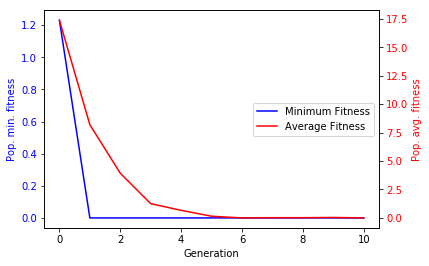

In [373]:
import time
import random

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import benchmarks
import numpy

number_of_variables=1
x_min= -5
x_max = 5
pop_size= 50
generations= 10


start_time=time.time()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual",  list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator
toolbox.register("attr_float", random.uniform, a=x_min, b=x_max)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, number_of_variables)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

y_min= objectiveFunction([x_min])[0]
y_max= objectiveFunction([x_max])[0]



# Operator registering
toolbox.register("evaluate", benchmarks.rastrigin)
toolbox.register("mate", tools.cxUniform, indpb=0.05)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    random.seed(64)
    
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_fit.register("avg", numpy.mean)
    stats_fit.register("std", numpy.std)
    stats_fit.register("min", numpy.min)
    stats_fit.register("max", numpy.max)
    stats_fit.register("all", list)
    
    stats_ind = tools.Statistics(lambda ind: ind)
    stats_ind.register("all", list)
    
    mstats = tools.MultiStatistics(fitness=stats_fit, ind=stats_ind)

    pop, logbook = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=0.5, 
        mutpb=0.2, 
        ngen=generations,
        stats=mstats, 
        halloffame=hof,
        verbose=False
    )

end_time = time.time()
solve_time = end_time - start_time
#print(pop[1])
print("Solve time is {}".format(solve_time))

### Draw graph
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["fitness"].select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Pop. min. fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
ax2.set_ylabel("Pop. avg. fitness", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

### Show final population
# pop

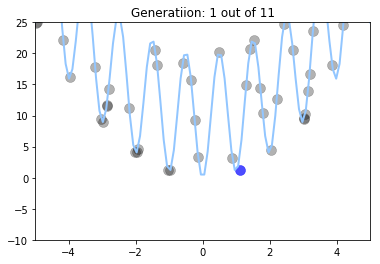

In [375]:
### Show animation
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

# https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
scats = []

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_min, x_max))
ax.set_ylim(( -10, y_max))
x = np.linspace(x_min, x_max, 100)
y = np.asarray([benchmarks.rastrigin([elem]) for elem in x])

line, = ax.plot([], [], lw=2)
line.set_data(x, y)

def animate(i):
    
    ax.set_title("Generatiion: {} out of {}".format(i+1, len(fit_mins)))

    # https://stackoverflow.com/questions/43074828/remove-precedent-scatterplot-while-updating-python-animation
    global scats
        # first remove all old scatters
    for scat in scats:
        scat.remove()
    scats=[]

    x_all = logbook.chapters['ind'].select('all')[i]
    y_all = logbook.chapters['fitness'].select('all')[i]
    
    y=fit_mins[i]
    x=sqrt(y)
    
    scats.append(ax.scatter(x_all, y_all, lw=0.5, s=100, color='black', alpha=0.3))
    scats.append(ax.scatter(x, y, lw=0.5, s=100, color='blue', alpha=0.7))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(fit_mins), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())